IMPLEMENTING LOGISTIC REGRESSION USING BATCH GRADIENT DESCENT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

m = x_train.shape[0]  #number of data samples
n = x_train.shape[1]  #number of features

print(x_train)
print(y_train)
print(m,n)

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
[0 0 0 1 1 1]
6 2


plotting the feature space

In [3]:
x_0 = []  #has those data samples which have a negative class output
x_1 = []  #has those data samples which have a positive class output

for i in range(m):
    if y_train[i] == 0:
        x_0.append(x_train[i])
    else:
        x_1.append(x_train[i])

x_0 = np.array(x_0); x_1 = np.array(x_1)
print(x_0)
print(x_1)

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]]
[[3.  0.5]
 [2.  2. ]
 [1.  2.5]]


In [4]:
x0 = x_train[:, 0]  #first feature
x1 = x_train[:, 1]  #second feature

print(x0)
print(x1)

[0.5 1.  1.5 3.  2.  1. ]
[1.5 1.  0.5 0.5 2.  2.5]


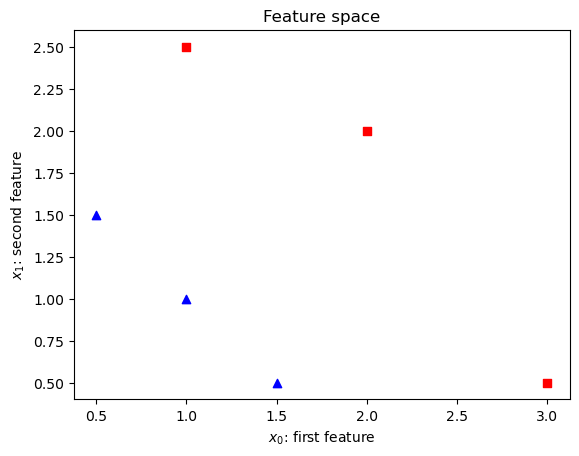

In [5]:
plt.scatter(x_1[:, 0], x_1[:, 1], c='r', marker='s')  #red ones are positive class
plt.xlabel("$x_0$: first feature")
plt.scatter(x_0[:, 0], x_0[:, 1], c='b', marker='^')  #blue ones are neg class
plt.ylabel("$x_1$: second feature")
plt.title('Feature space')
plt.show()

finding the cost 

In [6]:
def sigmoid(x, w, b):
    """
    returns the sigmoid of w.x + b

    Args: 
        x (ndarray (n,)): a single data point
        w (ndarray (n,)): vector of feature weights
        b (scalar): bias

    Returns:
        s (scalar): the sigmoid of w.x + b
    """
    s = 1/(1+np.exp(-np.dot(w, x) - b))
    return s

In [7]:
def calculate_cost(x, y, w, b, m):
    """
    returns the cost for a specific data sample

    Args: 
        x (ndarray (m,n)): matrix of the features
        y (ndarray (m,)): array of the targets
        w (ndarray (n,)): weight array
        b (scalar): bias
        m (scalar): number of data samples

    Returns:
        J (scalar): the cost for that data sample
    """

    J = 0

    for i in range(m):
        J += y[i]*np.log(sigmoid(x[i], w, b)) + (1-y[i])*np.log(1 - sigmoid(x[i], w, b))

    J /= (-m)

    return J

finding the gradient vector

In [8]:
def calculate_gradient(x, y, w, b, m, n):
    """
    returns d(gradient vector for each of the features) and dJ_db(gradient of cost wrt b)

    Args:
        x (ndarray (m,n)): the feature matrix
        y (ndarray (m,)): array containing the targets
        w (ndarray (n,)): the weight array for the features
        b (scalar): the bias
        m (scalar): the number of training samples
        n (scalar): the number of features

    Returns:
        d (ndarray (n,)): the gradient of cost wrt each of the features
        dJ_db (scalar): the gradient of cost wrt b for that data sample
    """
    d = []
    dJ_db = 0

    for i in range(n):
        d.append(
            sum([(sigmoid(x[j], w, b) - y[j])*x[j][i] for j in range(m)])/m
        )
    
    dJ_db += sum([(sigmoid(x[k], w, b)- y[k]) for k in range(m)])/m

    d = np.array(d)


    return d, dJ_db

implementing the logistic regression

In [9]:
def logistic_regr(x, y, w, b, m, n, e, a):
    """
    returns d(gradient vector), dJ_db (grdient of cost wrt b), e_history, cost_history

    Args:
        x (ndarray (m,n)): feature matrix
        y (ndarray (m,)): array with target values
        w (ndarray (n,)): array with weights for the features
        b (scalar): bias
        m (scalar): number of training samples
        n (scalar): number of features
        e (scalar): number of epochs
        a (scalar): learning rate

    Returns:
        w (ndarray (n,)): trained weights
        b (scalar): trained value of bias
        e_history (list): list of every 100s of epochs
        cost_history (list): list of cost for every 100 epoch
    """


    e_history = []
    cost_history = []

    for i in range(e):   #epochs
        d, dJ_db = calculate_gradient(x, y, w, b, m, n)

        w -= a*d
        b -= a*dJ_db

        if (i+1)%1000 == 0 or i ==0:
            J = calculate_cost(x, y, w, b, m)
            e_history.append(i+1)
            cost_history.append(J)
            print(f"Iteration: {i+1} cost: {J}")
        
    return w, b, e_history, cost_history


In [10]:
w_in = np.zeros(n)
b_in = 0
a = 0.1
epochs = 10000

w, b, e_history, cost_history = logistic_regr(x_train, y_train, w_in, b_in, m, n, epochs, a)

Iteration: 1 cost: 0.684610468560574
Iteration: 1000 cost: 0.1592335649264797
Iteration: 2000 cost: 0.08464109524940833
Iteration: 3000 cost: 0.05707199929670009
Iteration: 4000 cost: 0.042918276134429036
Iteration: 5000 cost: 0.03434535175949304
Iteration: 6000 cost: 0.028608582605098992
Iteration: 7000 cost: 0.024505087438574217
Iteration: 8000 cost: 0.021426396760803046
Iteration: 9000 cost: 0.019032264597755078
Iteration: 10000 cost: 0.017117768890292925


In [11]:
print(w)
print(b)

[5.28123029 5.07815608]
-14.222409982019837


plotting the learning curve

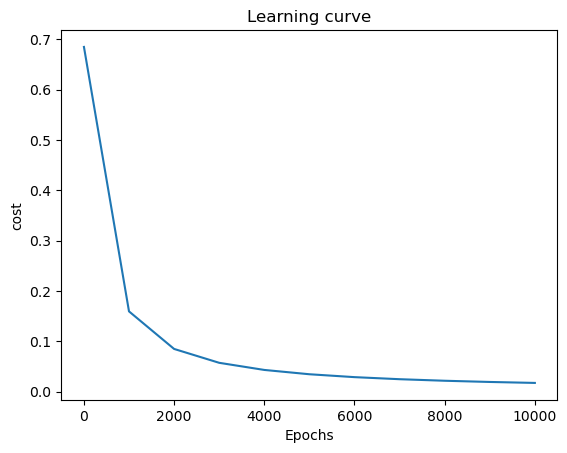

In [12]:
plt.plot(e_history, cost_history)
plt.xlabel("Epochs")
plt.ylabel("cost")
plt.title("Learning curve")
plt.show()

plotting the feature space again with the newfound decision boundary line

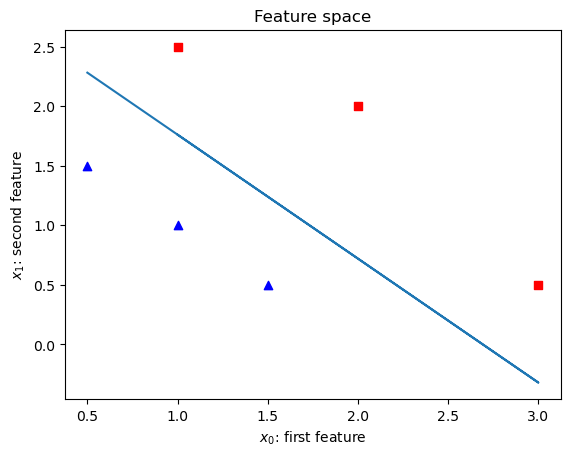

In [13]:
plt.scatter(x_1[:, 0], x_1[:, 1], c='r', marker='s')  #red ones are positive class
plt.xlabel("$x_0$: first feature")
plt.scatter(x_0[:, 0], x_0[:, 1], c='b', marker='^')  #blue ones are neg class
plt.ylabel("$x_1$: second feature")
plt.title('Feature space')

plt.plot(x0, (-b-w[0]*x0)/w[1])  #decision boundary line, the case when threshold value is 0.5

plt.show()

making predictions

In [14]:
def trained_model(x):
    """
    returns the output of the classification type model made here

    Args:
        x (ndarray (n,)): a single data sample

    Returns:
        o (scalar): the output, 0 or 1
    """
    global w, b
    
    o = 0
    o_ = sigmoid(x, w, b)
    if o_ >= 0.5:
        o = 1
    
    return o

In [15]:
output = trained_model(np.array([1, 9]))
print(output)

1
